# **SVD-Based Image Compression**





### **1.1 Importing Libraries and Loading the Image**

Width (n): 1920, Height (m): 1200, Channels: 3


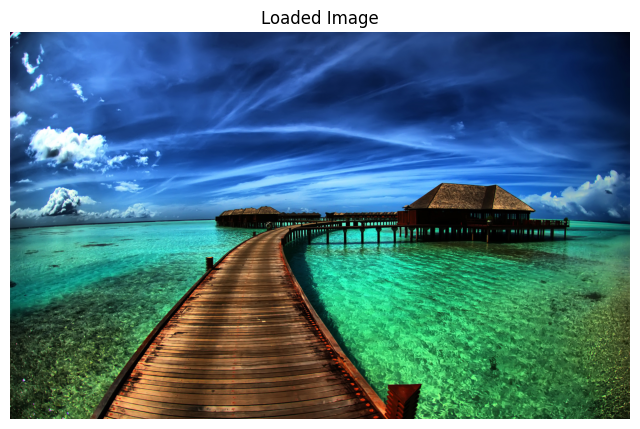

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
!pip install seaborn

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Install seaborn (if not already installed)
# !pip install seaborn  # Uncomment this line if seaborn is not installed

# Load the image and ensure it's in RGB mode
image_path = 'd.jpeg'

try:
    image = Image.open(image_path).convert('RGB')
except FileNotFoundError:
    print(f"Error: The file '{image_path}' was not found.")
    exit()

# Convert the image to a NumPy array
image_np = np.array(image)

# Get the dimensions of the image
m, n, channels = image_np.shape  # m = height, n = width
print(f"Width (n): {n}, Height (m): {m}, Channels: {channels}")

# Store m and n values
image_height = m
image_width = n

# Optionally, display the image
plt.figure(figsize=(8, 6))
plt.imshow(image_np)
plt.axis('off')  # Turn off axis labels
plt.title('Loaded Image')
plt.show()

# You can now use image_height and image_width as needed



### **1.2 Splitting the Image into RGB Channels**

In [38]:
# Split into RGB channels
R = image_np[:, :, 0]
G = image_np[:, :, 1]
B = image_np[:, :, 2]

### **1.3 Performing SVD on Each Channel**

In [39]:
# Compute SVD for each channel
U_R, S_R, Vt_R = np.linalg.svd(R, full_matrices=False)
U_G, S_G, Vt_G = np.linalg.svd(G, full_matrices=False)
U_B, S_B, Vt_B = np.linalg.svd(B, full_matrices=False)

### **1.4 Reconstructing the Image Using Top k Singular Values**

In [40]:
def reconstruct_image(k):
    R_reconstructed = np.dot(U_R[:, :k], np.dot(np.diag(S_R[:k]), Vt_R[:k, :]))
    G_reconstructed = np.dot(U_G[:, :k], np.dot(np.diag(S_G[:k]), Vt_G[:k, :]))
    B_reconstructed = np.dot(U_B[:, :k], np.dot(np.diag(S_B[:k]), Vt_B[:k, :]))
    reconstructed_image = np.stack((R_reconstructed, G_reconstructed, B_reconstructed), axis=2)
    return np.clip(reconstructed_image, 0, 255).astype('uint8')

### **1.5 Displaying Original and Reconstructed Images**

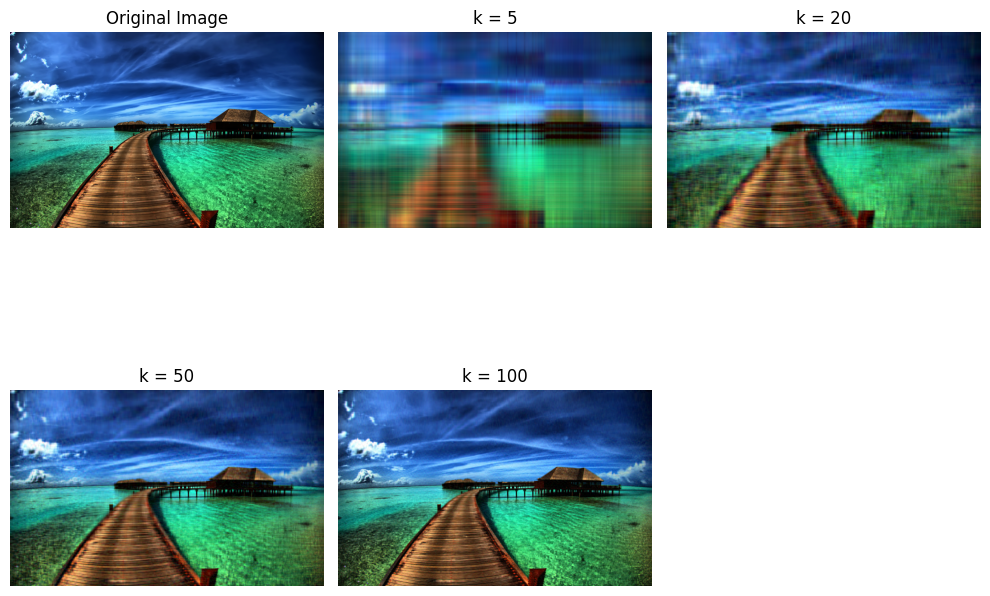

In [41]:
# Numbers of singular values to use
k_values = [5, 20, 50, 100]

# Plot the images
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(2, 3, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

# Reconstructed Images
for i, k in enumerate(k_values):
    reconstructed_img = reconstruct_image(k)
    plt.subplot(2, 3, i+2)
    plt.imshow(reconstructed_img)
    plt.title(f'k = {k}')
    plt.axis('off')

plt.tight_layout()
plt.show()

### **1.6 Calculating Reconstruction Error**

In [42]:
def reconstruction_error(k):
    reconstructed_image = reconstruct_image(k)
    error = np.linalg.norm(image_np.astype('float64') - reconstructed_image.astype('float64')) / np.linalg.norm(image_np.astype('float64'))
    return error

### **1.7 Plotting Reconstruction Error vs. k**

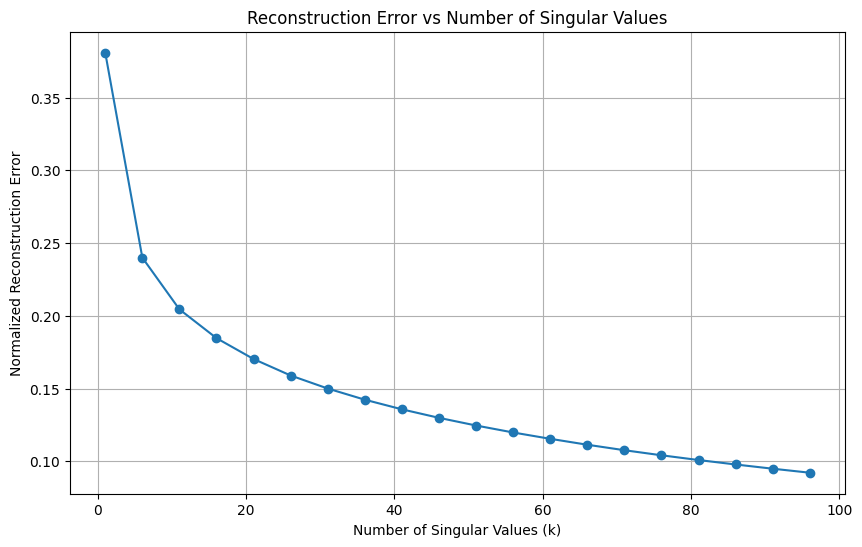

In [43]:
ks = range(1, 101, 5)
errors = [reconstruction_error(k) for k in ks]

plt.figure(figsize=(10, 6))
plt.plot(ks, errors, marker='o')
plt.title('Reconstruction Error vs Number of Singular Values')
plt.xlabel('Number of Singular Values (k)')
plt.ylabel('Normalized Reconstruction Error')
plt.grid(True)
plt.show()

### **1.8 Finding Minimum k for Desired Error Threshold**

In [44]:
threshold = 0.1
found = False
for k in range(1, 101):
    error = reconstruction_error(k)
    print(f"k = {k}, error = {error}")
    if error <= threshold:
        print(f"Minimum number of singular values required: {k}")
        found = True
        break

if not found:
    print("Error did not fall below the threshold within the given range of k.")

k = 1, error = 0.38086755381111276
k = 2, error = 0.31952938042325024
k = 3, error = 0.28907273777800707
k = 4, error = 0.26693422059943495
k = 5, error = 0.2522258750342492
k = 6, error = 0.24001086692273327
k = 7, error = 0.2311118327112428
k = 8, error = 0.222630792581563
k = 9, error = 0.2159533939430993
k = 10, error = 0.20970263017498827
k = 11, error = 0.20447757177285528
k = 12, error = 0.19977045582334416
k = 13, error = 0.19562319161200295
k = 14, error = 0.19168376115223157
k = 15, error = 0.18800050790364944
k = 16, error = 0.18468137524437134
k = 17, error = 0.1814252173938407
k = 18, error = 0.17837899671533378
k = 19, error = 0.17556931426742298
k = 20, error = 0.17291527064194193
k = 21, error = 0.1703317471316176
k = 22, error = 0.16785458685747895
k = 23, error = 0.1654526647928517
k = 24, error = 0.16314726872533883
k = 25, error = 0.16103104123922313
k = 26, error = 0.1590055914268264
k = 27, error = 0.1570647219632772
k = 28, error = 0.15519714213864694
k = 29, err

### **1.9 Displaying the Optimal Reconstructed Image**

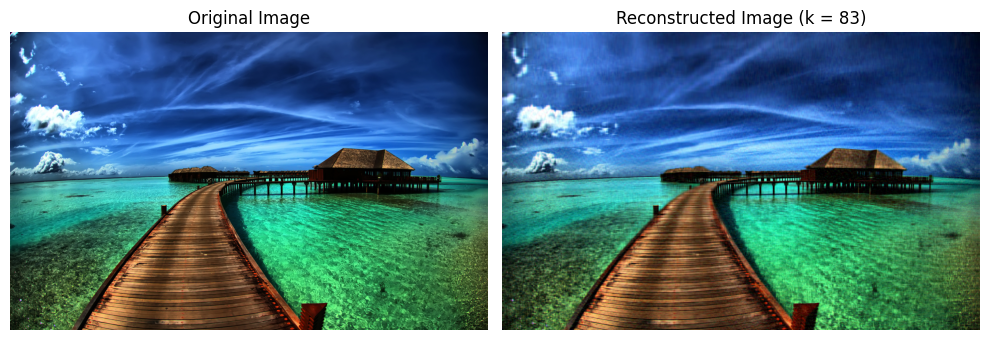

In [45]:
# Plot the images
plt.figure(figsize=(10, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title('Original Image')
plt.axis('off')

# Reconstructed Image with Optimal k
reconstructed_img = reconstruct_image(k)
plt.subplot(1, 2, 2)
plt.imshow(reconstructed_img)
plt.title(f'Reconstructed Image (k = {k})')
plt.axis('off')

plt.tight_layout()
plt.show()

In [46]:
def compression_percentage(k, m, n):
    # Number of elements in the original image (3 channels)
    original_elements = 3 * m * n

    # Number of elements in the compressed image (3 channels, with k singular values)
    compressed_elements = 3 * (m * k + k + k * n)

    # Compression percentage
    compression_ratio = (original_elements / compressed_elements) * 100

    return compression_ratio
optimal_k=k
if optimal_k is not None:
    optimal_compression_ratio = compression_percentage(optimal_k, m, n)
    print(f"Compression percentage for optimal k = {optimal_k}: {optimal_compression_ratio:.2f}%")

Compression percentage for optimal k = 83: 889.43%
